### Importing dependecies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from utils import *

### Loading data and plotting

In [3]:
Bitcoin_data = pd.read_csv('resources/coin_Bitcoin.csv',index_col = ['Date'], parse_dates=True)
Ethereum_data = pd.read_csv('resources/coin_Ethereum.csv',index_col = ['Date'], parse_dates=True)

In [24]:
Bitcoin_data

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,2987,Bitcoin,BTC,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2021-07-03 23:59:59,2988,Bitcoin,BTC,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2021-07-04 23:59:59,2989,Bitcoin,BTC,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


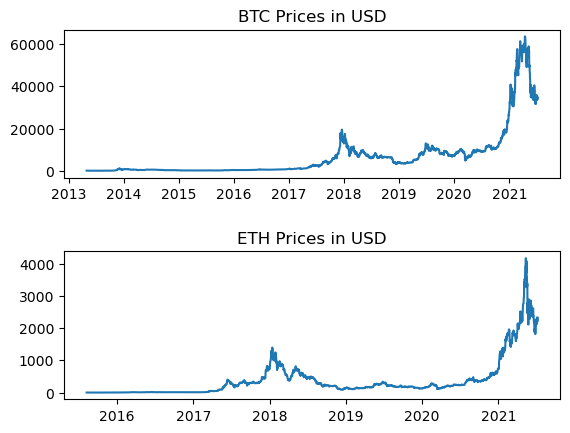

In [19]:
plt.subplot(2, 1, 1)
plt.plot(Bitcoin_data.index, Bitcoin_data['Close'])
plt.title('BTC Prices in USD')
plt.subplot(2, 1, 2)
plt.plot(Ethereum_data.index, Ethereum_data['Close'])
plt.title('ETH Prices in USD')
plt.subplots_adjust(hspace=0.5)

### Linear Regression Model setup

#### Choice of Predictors (Forward and Backward Stepwise Selection)

In [3]:
#Example: bitcoin prices
#Preprocessing data
Bitcoin_data = pd.read_csv('resources/coin_Bitcoin.csv')
X = Bitcoin_data.drop('Close', axis=1).drop(['Date', 'SNo', 'Name', 'Symbol'], axis=1)
Y = Bitcoin_data['Close']

print('Backward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns), algorithm='backward', features=list(X.columns)), Bitcoin_data, 'Close'))
print('Forward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns)), Bitcoin_data, 'Close'))

Backward: (96387115.4462964, 0.8501983851428145, (LinearRegression(), 96387115.4462964, ['High', 'Low', 'Open', 'Marketcap']))
Forward: (96387115.44629645, 0.8501984255096062, (LinearRegression(), 96387115.44629645, ['Marketcap', 'High', 'Low', 'Open']))


In [4]:
#Example: bitcoin prices
#Preprocessing data
Bitcoin_data = pd.read_csv('resources/coin_Ethereum.csv')
X = Bitcoin_data.drop('Close', axis=1).drop(['Date', 'SNo', 'Name', 'Symbol'], axis=1)
Y = Bitcoin_data['Close']

print('Backward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns), algorithm='backward', features=list(X.columns)), Bitcoin_data, 'Close'))
print('Forward:', validate_best_model(get_all_models(X, Y, n_iteration=len(X.columns)), Bitcoin_data, 'Close'))

Backward: (666975.6593475016, 0.9965598588092661, (LinearRegression(), 666975.6593475016, ['High', 'Low', 'Open']))
Forward: (666975.6593475016, 0.9965598588092666, (LinearRegression(), 666975.6593475016, ['Low', 'High', 'Open']))


Conclusion: with this selection we can have a clear idea of what are the best features to chose in order to fit the best model
            for the data set.

#### Linear regression: Bitcoin and Ethereum

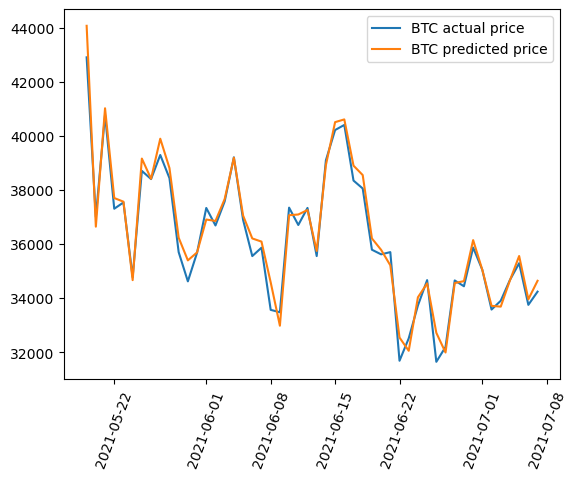

In [30]:
Bitcoin_data = pd.read_csv('resources/coin_Bitcoin.csv',index_col = ['Date'], parse_dates=True)
X = Bitcoin_data.drop('Close', axis=1).drop(['SNo', 'Name', 'Symbol'], axis=1)
Y = Bitcoin_data['Close']
Btc_model = LinearRegression().fit(X[['High', 'Low', 'Open', 'Marketcap']], Y)
y_predict = Btc_model.predict(X[['High', 'Low', 'Open', 'Marketcap']])

Bitcoin_data['Prediction'] = y_predict

sensibility = 50
data = Bitcoin_data.tail(sensibility)
plt.plot(data.index, data['Close'], label='BTC actual price')
plt.plot(data.index, data['Prediction'], label='BTC predicted price')
plt.xticks(rotation=70)
plt.legend()
plt.show()

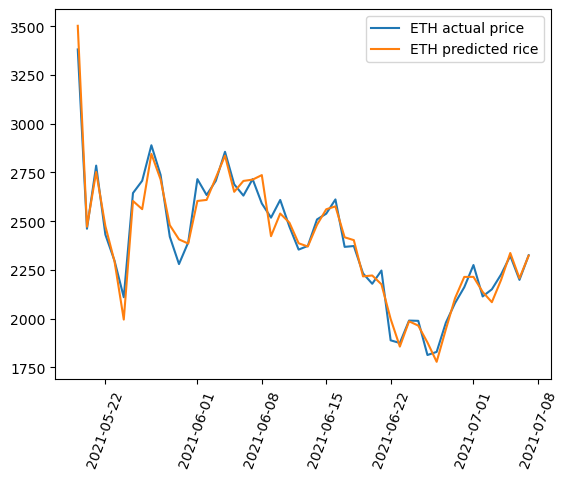

In [28]:
Eth_data = pd.read_csv('resources/coin_Ethereum.csv',index_col = ['Date'], parse_dates=True)
X = Eth_data.drop('Close', axis=1).drop(['SNo', 'Name', 'Symbol'], axis=1)
Y = Eth_data['Close']
Eth_model = LinearRegression().fit(X[['High', 'Low', 'Open']], Y)
y_predict = Eth_model.predict(X[['High', 'Low', 'Open']])

Eth_data['Prediction'] = y_predict

sensibility = 50
data = Eth_data.tail(sensibility)
plt.plot(data.index, data['Close'], label='ETH actual price')
plt.plot(data.index, data['Prediction'], label='ETH predicted rice')
plt.xticks(rotation=70)
plt.legend()
plt.show()

**Conclusion**: Here, we are plotting the last 50 data points (The number can be changed by tuning the sensibility variable). We can see that the model has done pretty well for both BTC and ETH predictions.<br>
**Note**: The predictors for ETH are based on the features Selection previously done. For the NFT features, see nft.ipnyb